# HMI Showcase: Cutout

- https://docs.sunpy.org/en/stable/generated/gallery/showcase/hmi_cutout.html

This example demonstrates how to plot a cutout region of a `sunpy.map.Map`
with connector lines that indicate the region of interest in the full-disk
image.

Since this example deals with the creation of a specific style of image, there
are multiple lines that deal directly with matplotlib axes.

In [ ]:
import matplotlib.colors
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.data.sample import HMI_LOS_IMAGE

First, we use the sample HMI LOS image and focus the cutout over an active
region near the solar center.

In [ ]:
magnetogram = sunpy.map.Map(HMI_LOS_IMAGE).rotate()
left_corner = SkyCoord(Tx=-142*u.arcsec, Ty=50*u.arcsec, frame=magnetogram.coordinate_frame)
right_corner = SkyCoord(Tx=158*u.arcsec, Ty=350*u.arcsec, frame=magnetogram.coordinate_frame)

Observatory,SDO
Instrument,HMI FRONT2
Detector,HMI
Measurement,magnetogram
Wavelength,6173.0
Observation Date,2011-06-07 06:32:11
Exposure Time,Unknown
Dimension,[1026. 1026.] pix
Coordinate System,helioprojective
Scale,[2.01714 2.01714] arcsec / pix
Reference Pixel,[512.5 512.5] pix

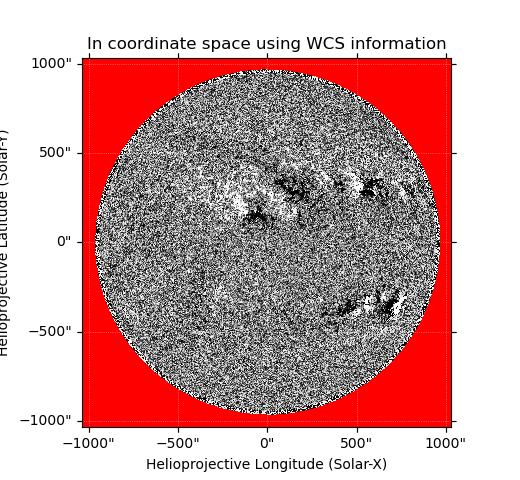
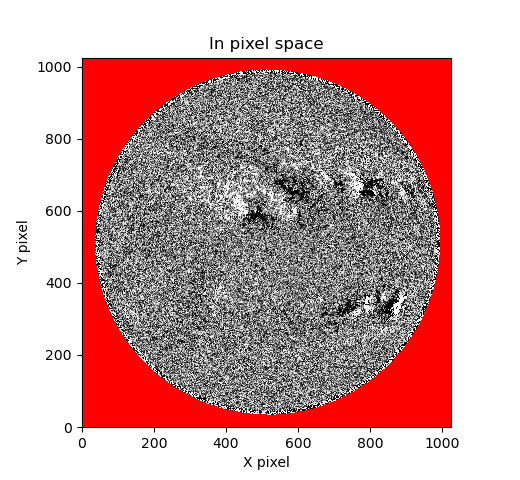
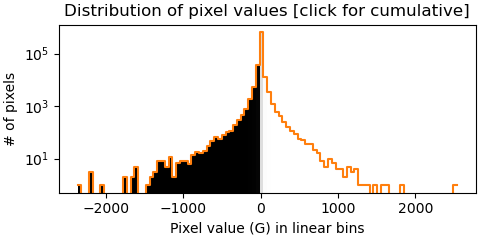
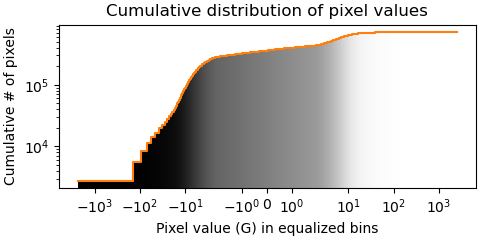

In [ ]:
magnetogram

We clean up the magnetogram by masking off all data that is beyond the solar
limb.

In [ ]:
hpc_coords = sunpy.map.all_coordinates_from_map(magnetogram)
mask = ~sunpy.map.coordinate_is_on_solar_disk(hpc_coords)
magnetogram_big = sunpy.map.Map(magnetogram.data, magnetogram.meta, mask=mask)

Observatory,SDO
Instrument,HMI FRONT2
Detector,HMI
Measurement,magnetogram
Wavelength,6173.0
Observation Date,2011-06-07 06:32:11
Exposure Time,Unknown
Dimension,[1026. 1026.] pix
Coordinate System,helioprojective
Scale,[2.01714 2.01714] arcsec / pix
Reference Pixel,[512.5 512.5] pix

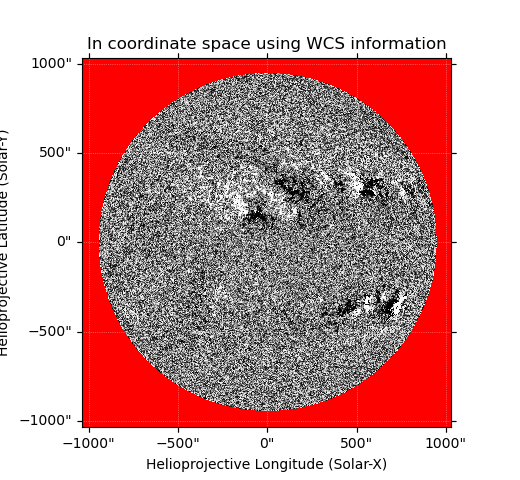
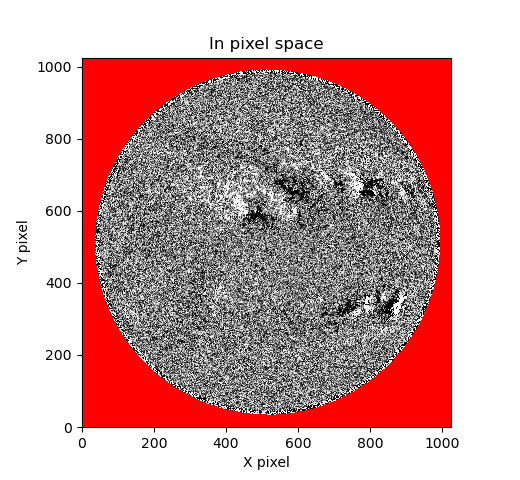
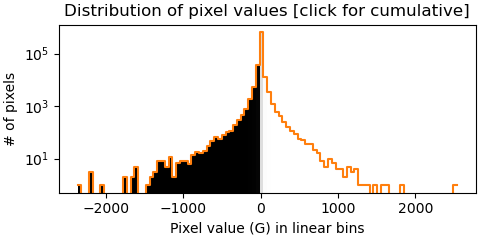
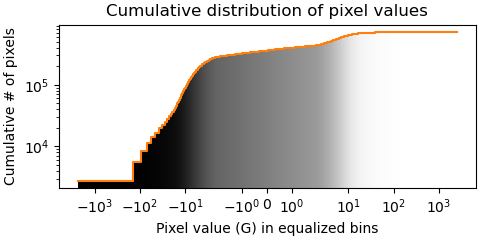

In [ ]:
magnetogram_big

We create the figure in two stages.
The first stage is plotting the full-disk magnetogram.

We create a nice normalization range for the image.

In [ ]:
norm = matplotlib.colors.SymLogNorm(50, vmin=-7.5e2, vmax=7.5e2)

Plot the full-disk magnetogram.

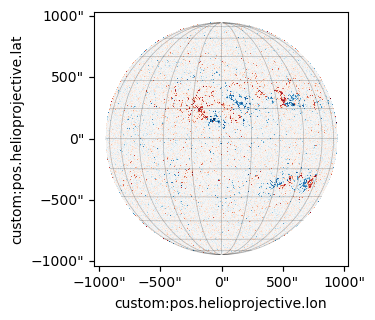

In [ ]:
fig = plt.figure(figsize=(7.2, 4.8))

#------------------------------------------------------------------------------------
ax1 = fig.add_subplot(121, projection=magnetogram_big)
magnetogram_big.plot(axes=ax1, cmap='RdBu_r', norm=norm, annotate=False,)
magnetogram_big.draw_grid(axes=ax1, color='black', alpha=0.25, lw=0.5)
#------------------------------------------------------------------------------------

plt.show()

These lines deal with hiding the axis, its ticks and labels.

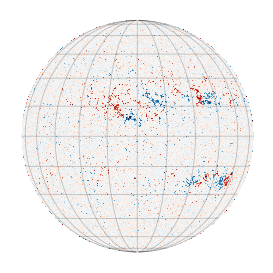

In [ ]:
fig = plt.figure(figsize=(7.2, 4.8))

#------------------------------------------------------------------------------------
ax1 = fig.add_subplot(121, projection=magnetogram_big)
magnetogram_big.plot(axes=ax1, cmap='RdBu_r', norm=norm, annotate=False,)
magnetogram_big.draw_grid(axes=ax1, color='black', alpha=0.25, lw=0.5)
#------------------------------------------------------------------------------------
for coord in ax1.coords:
    coord.frame.set_linewidth(0)
    coord.set_ticks_visible(False)
    coord.set_ticklabel_visible(False)
#------------------------------------------------------------------------------------

plt.show()

We draw the rectangle around the region we plan to showcase in the cutout image.

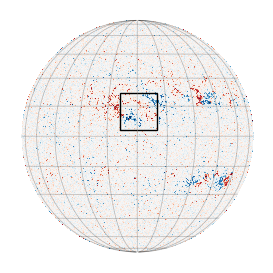

In [ ]:
fig = plt.figure(figsize=(7.2, 4.8))

#------------------------------------------------------------------------------------
ax1 = fig.add_subplot(121, projection=magnetogram_big)
magnetogram_big.plot(axes=ax1, cmap='RdBu_r', norm=norm, annotate=False,)
magnetogram_big.draw_grid(axes=ax1, color='black', alpha=0.25, lw=0.5)
#------------------------------------------------------------------------------------
for coord in ax1.coords:
    coord.frame.set_linewidth(0)
    coord.set_ticks_visible(False)
    coord.set_ticklabel_visible(False)
#------------------------------------------------------------------------------------
magnetogram_big.draw_quadrangle(left_corner, top_right=right_corner, edgecolor='black', lw=1)
#------------------------------------------------------------------------------------

plt.show()

The second stage is plotting the zoomed-in magnetogram.

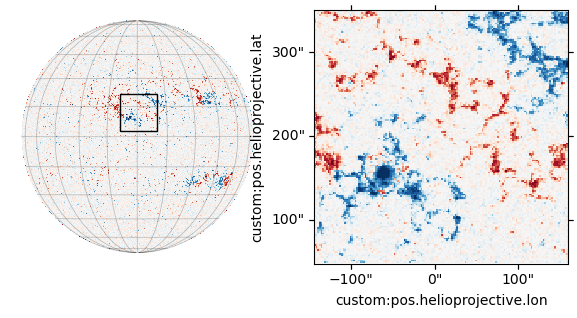

In [ ]:
fig = plt.figure(figsize=(7.2, 4.8))

#------------------------------------------------------------------------------------
ax1 = fig.add_subplot(121, projection=magnetogram_big)
magnetogram_big.plot(axes=ax1, cmap='RdBu_r', norm=norm, annotate=False,)
magnetogram_big.draw_grid(axes=ax1, color='black', alpha=0.25, lw=0.5)
#------------------------------------------------------------------------------------
for coord in ax1.coords:
    coord.frame.set_linewidth(0)
    coord.set_ticks_visible(False)
    coord.set_ticklabel_visible(False)
#------------------------------------------------------------------------------------
magnetogram_big.draw_quadrangle(left_corner, top_right=right_corner, edgecolor='black', lw=1)
#------------------------------------------------------------------------------------
magnetogram_small = magnetogram.submap(left_corner, top_right=right_corner)
ax2 = fig.add_subplot(122, projection=magnetogram_small)
im = magnetogram_small.plot(axes=ax2, norm=norm, cmap='RdBu_r', annotate=False,)
ax2.grid(alpha=0)
#------------------------------------------------------------------------------------

plt.show()

Unlike the full-disk image, here we just clean up the axis labels and ticks.

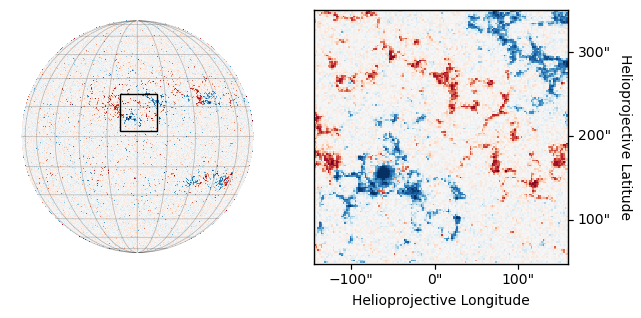

In [ ]:
fig = plt.figure(figsize=(7.2, 4.8))

#------------------------------------------------------------------------------------
ax1 = fig.add_subplot(121, projection=magnetogram_big)
magnetogram_big.plot(axes=ax1, cmap='RdBu_r', norm=norm, annotate=False,)
magnetogram_big.draw_grid(axes=ax1, color='black', alpha=0.25, lw=0.5)
#------------------------------------------------------------------------------------
for coord in ax1.coords:
    coord.frame.set_linewidth(0)
    coord.set_ticks_visible(False)
    coord.set_ticklabel_visible(False)
#------------------------------------------------------------------------------------
magnetogram_big.draw_quadrangle(left_corner, top_right=right_corner, edgecolor='black', lw=1)
#------------------------------------------------------------------------------------
magnetogram_small = magnetogram.submap(left_corner, top_right=right_corner)
ax2 = fig.add_subplot(122, projection=magnetogram_small)
im = magnetogram_small.plot(axes=ax2, norm=norm, cmap='RdBu_r', annotate=False,)
ax2.grid(alpha=0)
#------------------------------------------------------------------------------------
lon, lat = ax2.coords[0], ax2.coords[1]
lon.frame.set_linewidth(1)
lat.frame.set_linewidth(1)
lon.set_axislabel('Helioprojective Longitude',)
lon.set_ticks_position('b')
lat.set_axislabel('Helioprojective Latitude',)
lat.set_axislabel_position('r')
lat.set_ticks_position('r')
lat.set_ticklabel_position('r')
#------------------------------------------------------------------------------------

plt.show()

Now for the finishing touches, we add two lines that will connect
the two images as well as a colorbar.

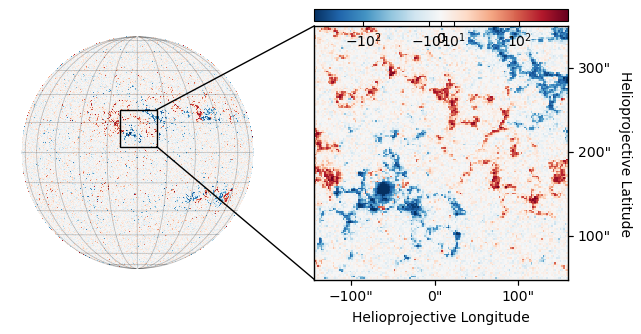

In [ ]:
fig = plt.figure(figsize=(7.2, 4.8))

#------------------------------------------------------------------------------------
ax1 = fig.add_subplot(121, projection=magnetogram_big)
magnetogram_big.plot(axes=ax1, cmap='RdBu_r', norm=norm, annotate=False,)
magnetogram_big.draw_grid(axes=ax1, color='black', alpha=0.25, lw=0.5)
#------------------------------------------------------------------------------------
for coord in ax1.coords:
    coord.frame.set_linewidth(0)
    coord.set_ticks_visible(False)
    coord.set_ticklabel_visible(False)
#------------------------------------------------------------------------------------
magnetogram_big.draw_quadrangle(left_corner, top_right=right_corner, edgecolor='black', lw=1)
#------------------------------------------------------------------------------------
magnetogram_small = magnetogram.submap(left_corner, top_right=right_corner)
ax2 = fig.add_subplot(122, projection=magnetogram_small)
im = magnetogram_small.plot(axes=ax2, norm=norm, cmap='RdBu_r', annotate=False,)
ax2.grid(alpha=0)
#------------------------------------------------------------------------------------
lon, lat = ax2.coords[0], ax2.coords[1]
lon.frame.set_linewidth(1)
lat.frame.set_linewidth(1)
lon.set_axislabel('Helioprojective Longitude',)
lon.set_ticks_position('b')
lat.set_axislabel('Helioprojective Latitude',)
lat.set_axislabel_position('r')
lat.set_ticks_position('r')
lat.set_ticklabel_position('r')
#------------------------------------------------------------------------------------
xpix, ypix = magnetogram_big.wcs.world_to_pixel(right_corner)
con1 = ConnectionPatch(
    (0, 1), (xpix, ypix), 'axes fraction', 'data', axesA=ax2, axesB=ax1,
    arrowstyle='-', color='black', lw=1
)
xpix, ypix = magnetogram_big.wcs.world_to_pixel(
    SkyCoord(right_corner.Tx, left_corner.Ty, frame=magnetogram_big.coordinate_frame))
con2 = ConnectionPatch(
    (0, 0), (xpix, ypix), 'axes fraction', 'data', axesA=ax2, axesB=ax1,
    arrowstyle='-', color='black', lw=1
)
ax2.add_artist(con1)
ax2.add_artist(con2)

pos = ax2.get_position().get_points()
cax = fig.add_axes([
    pos[0, 0], pos[1, 1]+0.01, pos[1, 0]-pos[0, 0], 0.025
])
cbar = fig.colorbar(im, cax=cax, orientation='horizontal')
#------------------------------------------------------------------------------------

plt.show()

For the colorbar we want it to have three fixed ticks.

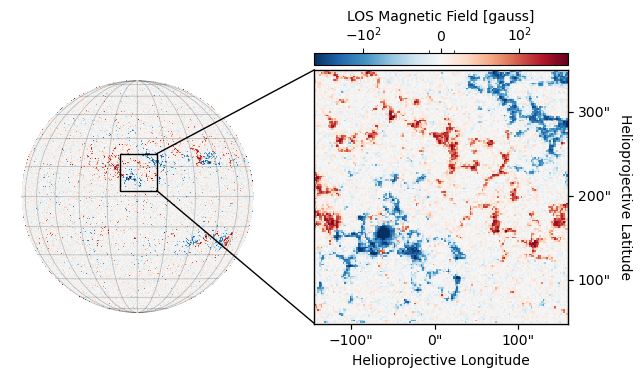

In [ ]:
fig = plt.figure(figsize=(7.2, 4.8))

#------------------------------------------------------------------------------------
ax1 = fig.add_subplot(121, projection=magnetogram_big)
magnetogram_big.plot(axes=ax1, cmap='RdBu_r', norm=norm, annotate=False,)
magnetogram_big.draw_grid(axes=ax1, color='black', alpha=0.25, lw=0.5)
#------------------------------------------------------------------------------------
for coord in ax1.coords:
    coord.frame.set_linewidth(0)
    coord.set_ticks_visible(False)
    coord.set_ticklabel_visible(False)
#------------------------------------------------------------------------------------
magnetogram_big.draw_quadrangle(left_corner, top_right=right_corner, edgecolor='black', lw=1)
#------------------------------------------------------------------------------------
magnetogram_small = magnetogram.submap(left_corner, top_right=right_corner)
ax2 = fig.add_subplot(122, projection=magnetogram_small)
im = magnetogram_small.plot(axes=ax2, norm=norm, cmap='RdBu_r', annotate=False,)
ax2.grid(alpha=0)
#------------------------------------------------------------------------------------
lon, lat = ax2.coords[0], ax2.coords[1]
lon.frame.set_linewidth(1)
lat.frame.set_linewidth(1)
lon.set_axislabel('Helioprojective Longitude',)
lon.set_ticks_position('b')
lat.set_axislabel('Helioprojective Latitude',)
lat.set_axislabel_position('r')
lat.set_ticks_position('r')
lat.set_ticklabel_position('r')
#------------------------------------------------------------------------------------
xpix, ypix = magnetogram_big.wcs.world_to_pixel(right_corner)
con1 = ConnectionPatch(
    (0, 1), (xpix, ypix), 'axes fraction', 'data', axesA=ax2, axesB=ax1,
    arrowstyle='-', color='black', lw=1
)
xpix, ypix = magnetogram_big.wcs.world_to_pixel(
    SkyCoord(right_corner.Tx, left_corner.Ty, frame=magnetogram_big.coordinate_frame))
con2 = ConnectionPatch(
    (0, 0), (xpix, ypix), 'axes fraction', 'data', axesA=ax2, axesB=ax1,
    arrowstyle='-', color='black', lw=1
)
ax2.add_artist(con1)
ax2.add_artist(con2)

pos = ax2.get_position().get_points()
cax = fig.add_axes([
    pos[0, 0], pos[1, 1]+0.01, pos[1, 0]-pos[0, 0], 0.025
])
cbar = fig.colorbar(im, cax=cax, orientation='horizontal')
#------------------------------------------------------------------------------------
cbar.locator = matplotlib.ticker.FixedLocator([-1e2, 0, 1e2])
cbar.set_label("LOS Magnetic Field [gauss]", labelpad=-40, rotation=0)
cbar.update_ticks()
cbar.ax.xaxis.set_ticks_position('top')
#------------------------------------------------------------------------------------

plt.show()